# **Lab 01**

## **Các thành viên**

<center>

|         Họ tên         |   MSSV   |
| :--------------------- | :------: |
| Trần Nguyễn Nhật Cường | 22127048 |
|    Nguyễn Công Tuấn    | 22127436 |
|     Trần Đăng Tuấn     | 22127438 |

</center>

## **Cài đặt và sử dụng các thư viện cần thiết**

In [ ]:
import csv

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## **Thu thập dữ liệu**

**Nền tảng thu thập** - Spotify

**Phương pháp thư thập** - Gọi APIs được Spotify hỗ trợ

**Cách lưu trữ dữ liệu sau khi thu thập** - Lưu thành file vietnamese_songs.csv (comma-separated value) 

In [61]:
sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id='f1225ca7d4d94873b8f8774b127aee92',
        client_secret='87130417da134688844d563a2e9e8ac7'
    )
)

In [ ]:
# vietnamese_playlists_id = [
#     '6XFOsAdp88ptBCdqUMAfmP',  # Nhạc Việt Hay Nhất Trên Spotify - VPOP 2021 On Spotify - Vpop Top Hits - Top 100 Việt Nam 
#     '0aiBKNSqiPnhtcw1QlXK5s',  # Nhạc Việt Top Hits - VPOP 2025
#     '3e7JoMenHvTB4sVE8fnn9O',  # nhạc chill Việt
#     '7tPGaU74ZtxIO9hsXVc9zj',  # Chill Vietnamese playlist
#     '2KfRwgF2GzDXHAPW1cCT7X',  # VPOP 2021-2022-2023
#     '02zSPmcae3ct4moT8om7kK',  # VPOP 2016-2017-2018
#     '4pkof2WT0Spca1pX3j2dh4',  # Vietnamese (V-Pop) 2025
#     '4ybaEp8KXd6YpHFy1npofA',  # VPop 2010-2016
#     '2U30HdoDyEZKr06144F4Jw',  # Vpop 2016-2019
#     '0ZOm8M5G8L7GHkTiU7DcMC',  # Vpop 2015s
#     '5f8z9oeanvcYu9ByRtoi9H',  # Vpop - Old but Gold
#     '6luqC1Np20Z0Ps576JFNj8',  # Nhạc Việt 2000s-2010s
#     '26OywSeeLgG0oJZlpq01nz',  # Vpop Làn sóng xanh for 8x 9x
#     '6DciQq1Mx1RKhlxNuKTn8q',  # Top Vpop VietNam
#     '56p6Zs4yC2ZVsHB6Dd9msj',  # Vpop 2020
#     '7p4UoGDCIhfTKavwQKTE2H',  # Vpop 2000-2011
#     '0mrqaVOe6KYEEcaSYhVK4a',  # VPOP TOP HITS Nhạc Việt Hay & Mới Nhất 2023 - Top 100+ Bài Hát Yêu Thích Được Nghe Nhiều Nhất
#     '2QL9xisvT5VOda2nGoH6QY',  # VPOP 2016 2017 2018
#     '44oq55UFBOGqzbwAUzrGvM',  # VPOP Tiktok
#     '5qZ3WQIZBbaogqsLh6i5lF',  # VPOP playlist
#     '4LzZcuYBacrMSX81LLvs9A',  # Top 50 VPOP nhiều lượt nghe nhất trên Spotify
#     '2yWOVvbnR2yPnVHwUnJjKW',  # VPOP 2013
#     '14Qvvt5OQng5ScEov3FpGW',  # VPOP 2014
#     '0d2Vu9QxnkmbNsBiecjGA1',  # VPOP 2015
#     '3ECBachqjVyTjkygCvBMN7',  # VPOP 2016
#     '2QOxomAadLMZ1Pr498bCP1',  # VPOP 2017
#     '2bFktF75SaQMWfJOjotEMP',  # VPOP 2018
#     '7LmFDhL7FmkHt1pSgcWqNy',  # VPOP 2019
#     '0ywpVJwBWNsmrG4nfGXOhs',  # VPOP 2020
#     '1cvnE797cGbHDeoz4uCaPd',  # VPOP 2021
#     '74nhehkDb5m0iaWYMUzrDQ',  # VPOP 2022
#     '5r0mdLamHzeoCRh5g93WL5',  # Playlist suy dễ ngủ
#     '5xfZuakPjpZpy2qw5bJb3w',  # Một lít cho người lụy tình
#     '5ttuZoKUA8dgz9MyFeNjxZ',  # Playlist Nhạc Indie Việt Nam
#     '7Ib0lAD83EY4UasjiBqQf5',  # Playlist nhạc việt để chill
#     '42L92ofycEfBmvA1SZO2C3',  # Nhạc Việt (8x-9x)
#     '5h45fHO4GoxW96Z1uG663h',  # Nhạc Việt xưa
#     '0ydtbJkoAgFL6MHZwovl28',  # Nhạc hoa lời việt 7x-8x-9x bât hủ
#     '4etsQHVmmSFTvR7LxYV9ch',  # Vọng cổ - Cải lương   
#     '1Tiblgs4lWkxYqTrDEZcII',  # Cải lưong Việt Nam    
#     '3i38ZH5FIzalHEkYcxtuwt',  # Cải lương xưa 
#     '4NePg2F6ZolnLQL3tNHQ1N',  # Top 100 nhạc Cách mạng
#     '4xGIvoVNyLfQEBNUqVLbEr',  # 100 ca khúc nhạc vàng trữ tình hay nhất
#     '1v1Ev6Fm2RK7jvUPpChAwj',  # Nhạc xưa bất hủ - nhạc bolera hay nhất
#     '0Gi20HOQSsgzbmTL9zthTI',  # Nhạc trữ tình Bolero
#     '1I4ecxMj4322qEIXuLnFp7',  # Mỹ Tâm Bolero
# ]


# def get_vietnamese_songs_and_artists():
#     '''
#     Extract all Vietnamese songs and artist details from popular Spotify playlists.
#     '''
#     vietnam_songs = []
#     artist_ids = set()
    
#     for playlist_id in vietnamese_playlists_id:
#         offset = 0
#         limit = 100  
#         while True:
#             results = sp.playlist_items(playlist_id, market='VN', limit=limit, offset=offset)
            
#             if not results or 'items' not in results or not results['items']:
#                 break 

#             for item in results['items']:
#                 track = item.get('track')
#                 if not track:
#                     continue
                
#                 album = track.get('album', {})
#                 artists = track.get('artists', [])
#                 artist_names = ', '.join([artist['name'] for artist in artists]) if artists else 'null'
                
#                 for artist in artists:
#                     artist_ids.add(artist['id'])

#                 vietnam_songs.append({
#                     'name': track.get('name', 'null'),
#                     'release_date': album.get('release_date', 'null'),
#                     'album_type': album.get('album_type', 'null'),
#                     'album_name': album.get('name', 'null'),
#                     'artists': artist_names,
#                     'duration_ms': track.get('duration_ms', 'null'),
#                     'popularity': track.get('popularity', 'null'),
#                     'spotify_url': track.get('external_urls', {}).get('spotify', 'null'),
#                 })
            
#             offset += limit

#     return vietnam_songs, list(artist_ids)

# def get_artist_details(artist_ids):
#     '''
#     Retrieve artist details using Spotify API.
#     '''
#     artist_info = []
    
#     for artist_id in artist_ids:
#         artist = sp.artist(artist_id)
#         artist_info.append({
#             'name': artist.get('name', 'null'),
#             'followers': artist.get('followers', {}).get('total', 'null'),
#             'popularity': artist.get('popularity', 'null'),
#             'spotify_url': artist.get('external_urls', {}).get('spotify', 'null'),
#         })
    
#     return artist_info

# def save_to_csv(data, filename, fieldnames):
#     '''
#     Save extracted data into a CSV file.
#     '''
#     with open(filename, mode='w', newline='', encoding='utf-8') as file:
#         writer = csv.DictWriter(file, fieldnames=fieldnames)
#         writer.writeheader()
#         for row in data:
#             writer.writerow(row)

# vietnam_songs, artist_ids = get_vietnamese_songs_and_artists()
# save_to_csv(vietnam_songs, 'vietnamese_songs.csv', [
#     'name', 'release_date', 'album_type', 'album_name', 'artists', 'duration_ms', 'popularity', 'spotify_url'
# ])

# artist_info = get_artist_details(artist_ids)
# save_to_csv(artist_info, 'artists_info.csv', ['name', 'followers', 'popularity', 'spotify_url'])

## **Đọc bộ dữ liệu**

In [63]:
tracks = pd.read_csv(filepath_or_buffer='./vietnamese_songs.csv')
tracks.head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
0,Chúng Ta Của Hiện Tại,2020-12-20,single,Chúng Ta Của Hiện Tại,Sơn Tùng M-TP,301538,0.0,https://open.spotify.com/track/17iGUekw5nFt5mI...
1,Đi Về Nhà,2020-12-20,single,Đi Về Nhà,"Đen, JustaTee",200000,57.0,https://open.spotify.com/track/7LVrrX8pkzI9fMF...
2,Sinh Ra Đã Là Thứ Đối Lập Nhau,2018-03-01,single,Sinh Ra Đã Là Thứ Đối Lập Nhau,Emcee L (Da LAB),234168,0.0,https://open.spotify.com/track/6IAqflHsPVm4EpY...
3,Bước Qua Mùa Cô Đơn,2020-12-10,single,Bước Qua Mùa Cô Đơn,Vũ.,278823,42.0,https://open.spotify.com/track/7wkX67ruxr3x2GF...
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...


In [64]:
artists = pd.read_csv(filepath_or_buffer='./artists_info.csv')
artists.head()

,name,followers,popularity,type,spotify_url
0,B-Wine,25056,39,artist,https://open.spotify.com/artist/68Vj5ArAHBx2K0...
1,Hoài Linh,1204,6,artist,https://open.spotify.com/artist/1NjP7vajmbOlCR...
2,Anh Phan,100407,39,artist,https://open.spotify.com/artist/6Zx90B1VRgR4TB...
3,Ngân Ngân,10059,38,artist,https://open.spotify.com/artist/2ukex9mJuIbR6m...
4,Hồ Việt Trung,44441,30,artist,https://open.spotify.com/artist/0XOHQOteNO7pqY...


## **Khám phá dữ liệu**

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính trong bộ dữ liệu `vietnamese_songs.csv`

<center>

| **Tên thuộc tính** | **Ý nghĩa** |
| -----              | -----       |
| **name** | Tên bài hát |
| **release_date** | Ngày bài hát được ra mắt/phát hành |
| **album_type** | Loại album mà bài hát thuộc về (ví dụ: album, single, compilation) |
| **album_name** | Tên của album mà bài hát thuộc về |
| **artists** | Tên của các nghệ sĩ trình diễn bài hát. Nếu có nhiều nghệ sĩ, tên các nghệ sĩ sẽ được phân tách bằng dấu phẩy (",") |
| **duration_ms** | Độ dài của bài hát tính theo đơn vị milli giây |
| **popularity** | Độ phổ biến của bài hát trên nền tảng Spotify, được tính từ 0 đến 100 (100 là phổ biến nhất) |
| **sportify_url** | Liên kết URL dẫn đến bài hát trên nền tảng Spotify |


</center>

## **Tiền xử lý dữ liệu**

### **Tổng quan về dữ liệu**

In [65]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5991 non-null   object 
 1   release_date  5992 non-null   object 
 2   album_type    5992 non-null   object 
 3   album_name    5989 non-null   object 
 4   artists       5989 non-null   object 
 5   duration_ms   5994 non-null   int64  
 6   popularity    5993 non-null   float64
 7   spotify_url   5993 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 374.8+ KB


**Nhận xét**
- Dữ liệu có 4120 dòng và 8 thuộc tính (cột)
- Có một số cột bị thiếu giá trị bao gồm **`name`**, **`release_date`**, **`album_type`**, **`album_name`**, **`artists`** và **`popularity`**
- **release_data** cần chuyển sang kiểu dữ liệu **`datatime`**

In [66]:
tracks.describe()

,duration_ms,popularity
count,5.994000e+03,5993.000000
mean,2.874430e+05,19.460871
std,1.799015e+05,20.673373
min,0.000000e+00,0.000000
25%,2.151720e+05,0.000000
50%,2.553245e+05,12.000000
75%,2.963022e+05,39.000000
max,2.922361e+06,73.000000


### **Thay đổi kiểu dữ liệu**

In [67]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('0'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
1051,Năm Ấy,0000,single,Năm Ấy,Đức Phúc,260351,37.0,https://open.spotify.com/track/7BSyMiUKDSXdnZ9...
1782,Năm Ấy,0000,single,Năm Ấy,Đức Phúc,260351,37.0,https://open.spotify.com/track/7BSyMiUKDSXdnZ9...
2239,Vì Sao Cuối Trời,0000,album,Những Bài Hát Hay Nhất Của Minh Vương M4U (ori...,Minh Vương M4U,251951,0.0,https://open.spotify.com/track/5CeVzm3UPr3rgVs...
2408,Anh Phải Làm Sao,0000,album,Anh Phải Làm Sao,Đan Trường,276532,0.0,https://open.spotify.com/track/1eGjdNUedFs5pbC...
2409,Kiếp Ve Sầu,0000,album,Album Nhạc Tuyển Vol1,Đan Trường,243853,0.0,https://open.spotify.com/track/5CNHksxHh3SQWDp...


In [68]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('1'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
2379,Hương Ngọc Lan,1998,album,Tóc Ngắn,Mỹ Linh,358333,20.0,https://open.spotify.com/track/7843ngQIIA5NLCx...
2380,Tóc Ngắn,1998,album,Tóc Ngắn,Mỹ Linh,276573,13.0,https://open.spotify.com/track/2NcpzPfzey5QFYx...
2381,Hoa Cỏ Mùa Xuân,1998,album,Tóc Ngắn,Mỹ Linh,223346,13.0,https://open.spotify.com/track/2AjVCrZoxoijNi4...
2856,Dĩ Vãng Nhạt Nhòa,1994,album,Mong Mo,"Lưu Bích, Tô Chấn Phong",237626,0.0,https://open.spotify.com/track/0tQX75vF3SMNgys...
4696,Long Me,1998,album,Cai Luong Tan Co Lan & Diep,Hương Lan,568928,5.0,https://open.spotify.com/track/0jbj0deUG9gOHdz...


In [69]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('2'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
135,Thái Bình Mồ Hôi Rơi,2013,album,m-tp M-TP,Sơn Tùng M-TP,318093,0.0,https://open.spotify.com/track/77WB1SRD0tGgkKQ...
136,Ấn Nút Nhớ... Thả Giấc Mơ,2013,album,m-tp M-TP,Sơn Tùng M-TP,244539,0.0,https://open.spotify.com/track/0zNyJEcrEbYvwA0...
137,Tiến Lên Việt Nam Ơi,2013,album,m-tp M-TP,Sơn Tùng M-TP,218627,0.0,https://open.spotify.com/track/7i5YAG2YaXwKSuj...
138,Remember Me - SlimV remix,2013,album,m-tp M-TP,"Sơn Tùng M-TP, Slim-V",203493,0.0,https://open.spotify.com/track/3Gunzjkn4oou0dZ...
139,Như Ngày Hôm Qua,2013,album,m-tp M-TP,Sơn Tùng M-TP,222981,0.0,https://open.spotify.com/track/6BToHhGtbW8eMQF...


In [70]:
tracks[tracks['release_date'].isna()].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
618,Và Rồi Em Block….,NaN,NaN,NaN,NaN,186528,NaN,https://open.spotify.com/episode/7pHlGWTt9ZQoK...
4527,Please Tell Me Why Bảo Thy X Vương Khang LYR...,NaN,NaN,NaN,NaN,266000,0.0,NaN


In [71]:
def fix_release_date(date: str) -> str:
    if not date or date.startswith('0'):
        return None
    if len(date) == 4:
        return date + '-01-01'
    return date

tracks['release_date'] = tracks['release_date'].astype(dtype=str).apply(func=fix_release_date)
tracks['release_date'] = pd.to_datetime(arg=tracks['release_date'], format='%Y-%m-%d')
tracks['release_date'].head()

0   2020-12-20
1   2020-12-20
2   2018-03-01
3   2020-12-10
4   2018-03-01
Name: release_date, dtype: datetime64[ns]

In [72]:
tracks.dtypes

name                    object
release_date    datetime64[ns]
album_type              object
album_name              object
artists                 object
duration_ms              int64
popularity             float64
spotify_url             object
dtype: object

### **Xử lý các bài hát bị trùng lặp**

In [73]:
print(f'Số lượng bài hát bị trùng lặp (dựa vào tên bài hát và tên nghệ sĩ): {tracks.duplicated(subset=['name', 'artists']).sum()}')

Số lượng bài hát bị trùng lặp (dựa vào tên bài hát và tên nghệ sĩ): 2325


In [74]:
tracks[tracks['name'] == 'Nàng Thơ']

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
255,Nàng Thơ,2018-03-01,album,25,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/6rVaOdWvFaNyVVX...
1581,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
1861,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
3503,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
3687,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...
3906,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
4079,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...
4185,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...
4245,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...


**Nhận xét**

Ví dụ xét bài hát **Nàng thơ** của nghệ sĩ **Hoàng Dũng**, chúng ta thấy bài hát được phát hành ở 2 thể loại khác nhau là **đĩa đơn (Nàng thơ)** và **album (25)**. Vì thế, chúng ta cần loại bỏ trùng lặp dựa vào `name`, `artists`, `album_type` và `album_name`




In [75]:
tracks.sort_values(by='release_date', inplace=True)
tracks.drop_duplicates(subset=['name', 'artists', 'album_type'], keep='last', inplace=True, ignore_index=True)

In [76]:
tracks[tracks['name'] == 'Nàng Thơ']

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
2206,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
2407,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...


### **Xử lý các dữ liệu dòng bị thiếu dữ liệu**

In [77]:
tracks.isna().sum()

name             2
release_date    30
album_type       2
album_name       4
artists          4
duration_ms      0
popularity       1
spotify_url      1
dtype: int64

In [78]:
tracks.shape[0] - tracks.dropna().shape[0]

30

In [79]:
tracks.dropna(inplace=True, ignore_index=True)

In [80]:
tracks.isna().sum()

name            0
release_date    0
album_type      0
album_name      0
artists         0
duration_ms     0
popularity      0
spotify_url     0
dtype: int64

### **Xử lý các dữ liệu bài hát bất hợp lý**

In [81]:
tracks[tracks['release_date'].dt.year < 2000].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
0,Rằm Tháng 7 (feat. R.Tee),1900-01-01,album,"Rap Việt, Vòng 1","RAP VIỆT, Rtee",204521,14.0,https://open.spotify.com/track/5AMPKrIvt28vObl...
1,Võ Đại Lang Bán Phở,1965-01-01,compilation,Cổ Nhạc Continental 2 - Võ Đại Lang Bán Phở,"Hoàng Giang, Kim Quang, Hề Minh, Hoàng Mai, Vă...",821545,0.0,https://open.spotify.com/track/2GwoVKOXGfr4W6Z...
2,Đắc Kỷ Ho Gà,1965-01-01,compilation,Cổ Nhạc Continental Số 4 - Đắc Kỷ Ho Gà,"Ba Vân, Ngọc Nuôi, Tùng Lâm, Tuý Phượng, Văn S...",806080,0.0,https://open.spotify.com/track/7DpFR2UJskYjySh...
3,Ngày Ấy Quen Nhau,1966-01-01,single,Cổ Nhạc Continental Số 37 - Ánh Sáng Đô Thành,"Thanh Nga, Thành Được",478973,0.0,https://open.spotify.com/track/2Y7YWIWBMU09ecV...
4,Độc Tấu Lục Huyền Cầm,1966-01-01,single,Cổ Nhạc Continental Số 30 - Độc Tấu Thanh Kim,Văn Vĩ,454766,0.0,https://open.spotify.com/track/4MkNq7OlJDYT0rf...


- Bài hát Rằm Tháng 7 ra đời năm 1900 là bất hợp lý vì chương trình Rap Việt lần đầu được công chiếu vào ngày 01/08/2020.

In [82]:
tracks = tracks.drop(index=tracks[tracks['release_date'].dt.year == 1900].index).reset_index(drop=True)

In [83]:
tracks.shape

(3721, 8)

### **Xử lý các nghệ sĩ có tên bất hợp lý**

In [84]:
multi_artists = artists[artists['name'].str.contains(',', regex=False)]

multi_artists

,name,followers,popularity,type,spotify_url


In [85]:
def is_artist_in_csv(artist_name, df):
    return artist_name in df['name'].values

# Function to fetch artist data from Spotify API
def fetch_artist_data(artist_name):
    results = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
    if results and results['artists']['items']:
        artist = results['artists']['items'][0]
        return {
            "name": artist['name'],
            "followers": artist['followers']['total'],
            "popularity": artist['popularity'],
            "type": artist['type'],
            "spotify_url": artist['external_urls']['spotify']
        }
    return None

new_artists = []
rows_to_remove = []

for index, row in multi_artists.iterrows():
    artist_names = row['name'].split(", ")  
    
    for artist in artist_names:
        if not is_artist_in_csv(artist, artists):
            artist_data = fetch_artist_data(artist)
            if artist_data:
                new_artists.append(artist_data)

    rows_to_remove.append(index)

artists.drop(rows_to_remove, inplace=True)

if new_artists:
    new_artists_df = pd.DataFrame(new_artists)
    artists = pd.concat([artists, new_artists_df], ignore_index=True)

artists.to_csv('artists_info.csv', index=False)

## **Các câu hỏi**

**Câu 1**: Tần suất phát hành nhạc tại thị trường âm nhạc Việt Nam trong 25 năm trở lại đây (từ 2000 đến 2024)?

In [86]:
tracks_2000_2024 = tracks[tracks['release_date'].dt.year.between(2000, 2024)]['release_date'].dt.year.value_counts().sort_index()
tracks_2000_2024.head()

release_date
2000    31
2001    76
2002    39
2003    74
2004    23
Name: count, dtype: int64

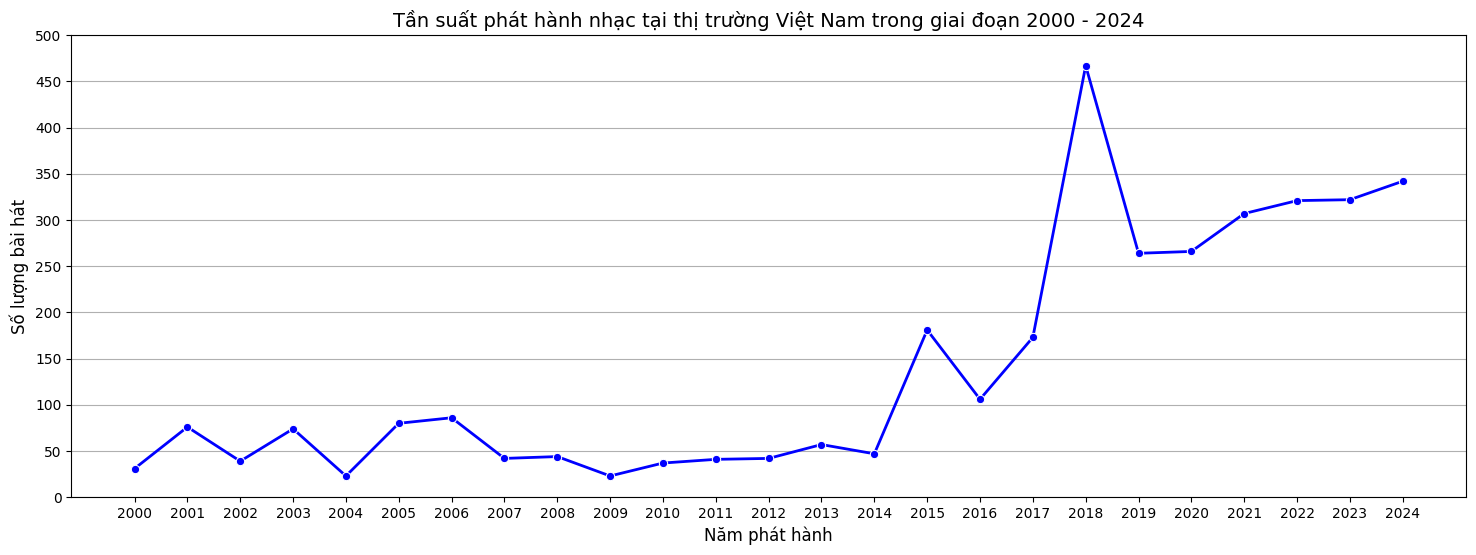

In [87]:
plt.figure(figsize=(18, 6))

sns.lineplot(x=tracks_2000_2024.index, y=tracks_2000_2024.values, marker='o', color='b', linewidth=2)

plt.xlabel(xlabel='Năm phát hành', fontsize=12)
plt.ylabel(ylabel='Số lượng bài hát', fontsize=12)
plt.title(label='Tần suất phát hành nhạc tại thị trường Việt Nam trong giai đoạn 2000 - 2024', fontsize=14)

plt.xticks(ticks=range(2000, 2025, 1))
plt.yticks(ticks=range(0, 501, 50))

plt.grid(axis='y')
plt.show()

**Nhận xét về xu hướng phát hành bài hát trên Spotify tại Việt Nam (2000 - 2025)**

**Trong giai đoạn 2000 - 2014**,

- Số lượng bài hát phát hành trên Spotify **còn rất ít**. 
- Bên cạnh đó, trong năm **2013** là năm có số lượng bài hát được phát hành nhiều nhất trong giai đoạn này với gần 50 bài hát.

$\Rightarrow$ Điều này có thể do Spotify chưa phổ biến tại Việt Nam hoặc chưa có dữ liệu đầy đủ về các bài hát phát hành trước đó.


**Trong giai đoạn 2015 - 2018**, 

- Có sự gia tăng đáng kể về số lượng bài hát được phát hành. 
- Năm 2018 là đỉnh cao nhất trong toàn bộ giai đoạn, với số lượng bài hát phát hành tăng vọt.

$\Rightarrow$ Điều này có thể phản ánh sự phát triển mạnh mẽ của thị trường nhạc số và sự gia nhập của nhiều nghệ sĩ Việt vào nền tảng Spotify.


**Trong giai đoạn 2019 - 2024**,

- Sau năm 2018, số lượng bài hát phát hành giảm mạnh vào năm 2019 nhưng nhanh chóng phục hồi và tiếp tục tăng trưởng.
- Giai đoạn 2020 - 2023 có xu hướng ổn định, duy trì mức phát hành cao.

$\Rightarrow$ Đây có thể là thời kỳ mà Spotify đã trở thành một kênh phân phối quan trọng đối với nghệ sĩ Việt Nam.

Ngoài ra, dữ liệu năm 2025 hiện tại rất thấp do dữ liệu chưa đầy đủ hoặc mới chỉ là một phần nhỏ của năm nên ta chưa thể có cái nhìn chính xác về xu hướng phát hành bài hát trên Spotify trong năm 2025.

#### **Câu 2**: Nghệ sĩ hoạt động tích cực và sôi nổi nhất trên Spotify tại thị trường Việt Nam trong năm 2024?

In [88]:
tracks_2024 = tracks[tracks['release_date'].dt.year == 2024]
tracks_by_artist_2024 = tracks_2024['artists'].str.split(pat=', ').explode().str.strip().value_counts().reset_index()
tracks_by_artist_2024

,artists,count
0,Hoa Tau,74
1,Bảo Quốc,22
2,Trọng Hữu,22
3,Phượng Liên,19
4,Thanh Nga,19
...,...,...
291,IC Music,1
292,Phương Ly,1
293,Xuan Tuyen,1
294,Hồng Duyên,1


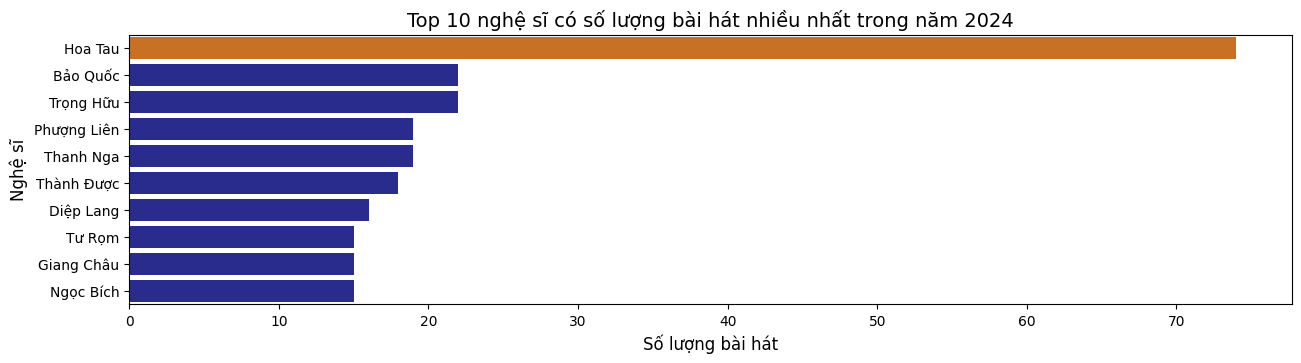

In [89]:
plt.figure(figsize=(15, 3.5))

sns.barplot(data=tracks_by_artist_2024.head(n=10), x='count', y='artists', hue='artists', orient='h',
            palette=['#e36f09' if count > 60 else '#191d9c' for count in tracks_by_artist_2024['count'].head(n=10)])

plt.xlabel(xlabel='Số lượng bài hát', fontsize=12)
plt.ylabel(ylabel='Nghệ sĩ', fontsize=12)
plt.title(label='Top 10 nghệ sĩ có số lượng bài hát nhiều nhất trong năm 2024', fontsize=14)

plt.show()

**Nhận xét về top 10 nghệ sĩ có số lượng bài hát nhiều nhất trên Spotify Việt Nam (2019-2024)**

Trong năm **2019** ghi nhận có nhiều nghệ sĩ thuộc dòng nhạc **Pop/Ballad** như **Cẩm Ly**, **Đan Trường**, **Noo Phước Thịnh** và họ cũng dẫn đầu với ***số lượng bài hát cao***. Xu hướng nhạc trẻ đến từ các nghệ sĩ trẻ như **JustaTee**, **Ngọt**, **Thịnh Suy**, **AMEE** đã xuất hiện nhưng ***chưa quá nổi bật*** 

$\Rightarrow$ **Thời kỳ của nhạc Pop/Ballad vẫn còn thống trị, phổ biến tại thị trường âm nhạc Việt Nam**


Trong năm **2020** ghi nhận việc **AMEE** vươn lên top 1, thể hiện sức hút của nhạc **Pop** tươi trẻ. **Hoàng Dũng**, **Hà Anh Tuấn** vẫn giữ phong độ với **Ballad**. **B Ray**, **Đen** xuất hiện, báo hiệu sự nổi lên của **Rap**

$\Rightarrow$ **Rap/Indie bắt đầu xuất hiện nổi bật trên thị trường âm nhạc Việt Nam bên cạnh thể loại Pop/Ballad đã quá quen thuộc ở những năm trước**


Trong năm **2021** ghi nhận có nhiều nghệ sĩ như MONSTAR, Chillies, Maswe đại diện cho dòng nhạc Indie/Pop-Rock. Rap có sự xuất hiện của RPT MCK, Low G, tlinh, phản ánh sự lan tỏa mạnh mẽ của dòng nhạc này.

$\Rightarrow$ **Thị trường âm nhạc Việt Nam dần dần tiếp nhận và bước chuyển sang thể loại Rap/Hip-Hop**

Trong năm **2022** ghi nhận việc **Low G** dẫn đầu, tiếp tục khẳng định sự thống trị của **Hip-Hop**. **Hoàng Thùy Linh**, **Orange**, **Đức Phúc** vẫn duy trì được lượng bài hát đáng kể.

$\Rightarrow$ **Các thể loại nhạc như Pop/Ballad, Rap/Hip-Hop và Indie,... vẫn tiếp tục phát triển trên thị trường âm nhạc Việt Nam**

Trong năm **2023** ghi nhận sự bùng nổ của những chương trình âm nhạc như việc **RAP VIỆT** đứng đầu do hiệu ứng từ chương trình cùng tên **Rap Việt** cùng với đó là sự xuất hiện của hàng loạt rapper xuất hiện như **RPT MCK**, **Wren Evans**, **Obito**, **Thắng**. Bên cạnh đó cũng kể đến chương trình **The Masked Singer** xuất hiện.

$\Rightarrow$ **Rap/Hip-Hop chiếm sóng và cũng là sự bùng nổ của những chương trình âm nhạc như Rap Việt và The Masked Singer**

Trong năm **2024** ghi nhận việc chương trình âm nhạc có quy mô lớn **ANH TRAI "SAY HI"** bất ngờ vươn lên vị trí đầu. Bên cạnh đó là sự xuất hiện của những tân binh như **Dương Domic**, **Pháp Kiều**, **Negav**, ...

$\Rightarrow$ **Thấy được sự xuất hiện mạnh mẽ từ thế hệ nghệ sĩ trẻ**

**Kết luận**
- Các dòng nhạc thay đổi theo thời gian khi mà từ **Pop/Ballad (2019-2020)** đến **Indie/Rap (2021-2022)** và cuối cùng là **Rap/Hip-Hop thống trị (2023-2024)**.
- Một số nghệ sĩ xuất hiện mạnh mẽ trong một năm nhưng sau đó giảm dần. Tuy nhiên vẫn có những nghệ sĩ hoạt động bền bỉ như **Low G**, **HIEUTHUHAI**, **tlinh** khi họ đã liên tục xuất hiện trong biểu đồ trên ở nhiều năm liền.
- Các chương trình âm nhạc tiêu biểu gồm **Rap Việt**, **The Masked Singer**, **ANH TRAI "SAY HI"** có tác động mạnh đến số lượng bài hát ra mắt.


#### **Câu 3:** Phân bố mức độ phổ biến của các bài hát tại thị trường Việt Nam hiện nay.

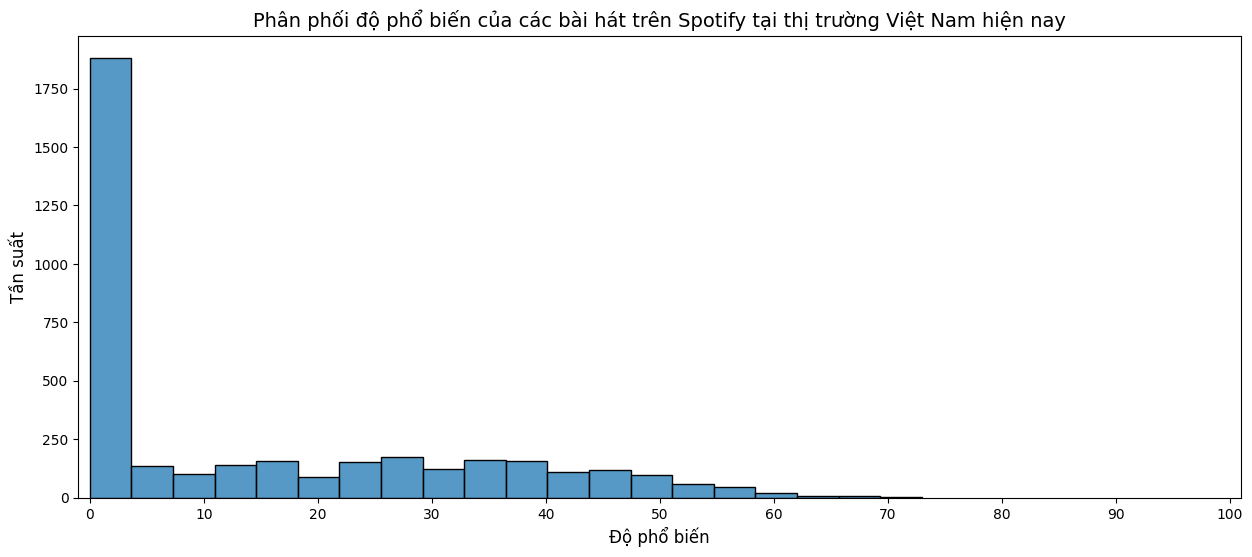

In [90]:
plt.figure(figsize=(15, 6))

sns.histplot(data=tracks['popularity'])

plt.xlabel(xlabel='Độ phổ biến', fontsize=12)
plt.ylabel(ylabel='Tần suất', fontsize=12)
plt.title(label='Phân phối độ phổ biến của các bài hát trên Spotify tại thị trường Việt Nam hiện nay', fontsize=14)

plt.xlim(left=-1, right=101)
plt.xticks(ticks=range(0, 101, 10))
plt.show()

#### **Câu 4:** Phân bố thời lượng các bài hát trên Spotify tại thị trường Việt Nam.

In [91]:
tracks['duration_ms'] /= 60000

In [92]:
tracks['duration_ms'].max()

48.70601666666666

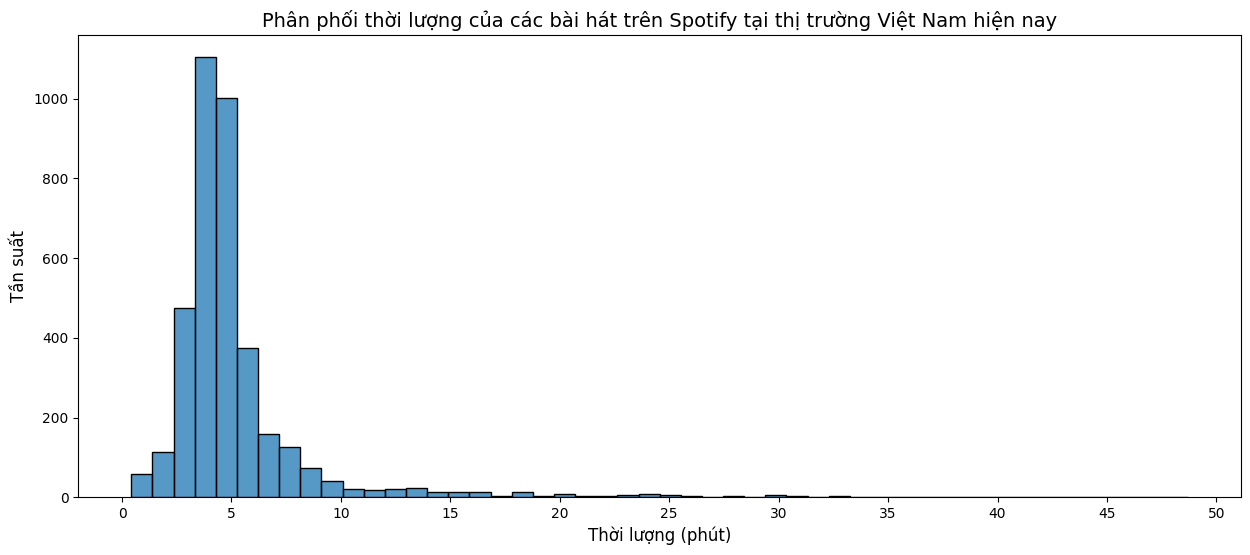

In [93]:
plt.figure(figsize=(15, 6))

sns.histplot(data=tracks['duration_ms'], bins=50)

plt.xlabel(xlabel='Thời lượng (phút)', fontsize=12)
plt.ylabel(ylabel='Tần suất', fontsize=12)
plt.title(label='Phân phối thời lượng của các bài hát trên Spotify tại thị trường Việt Nam hiện nay', fontsize=14)

plt.xticks(ticks=range(0, 51, 5))
plt.show()

#### **Câu 5:** Tỉ lệ các loại album trên Spotify tại thị trường Việt Nam

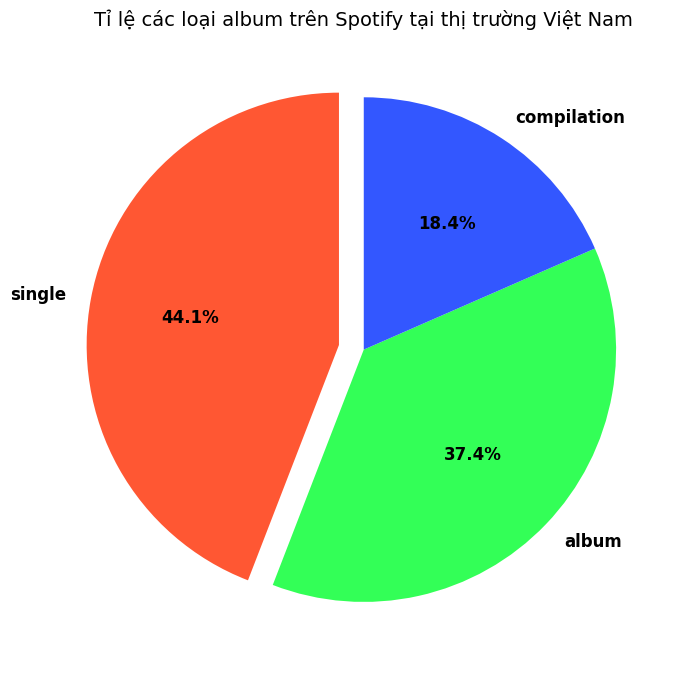

In [94]:
tracks['album_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(7, 7),
    explode=(0.1, 0, 0),
    colors=['#FF5733', '#33FF57', '#3357FF'],
    textprops={'fontsize': 12, 'fontweight': 'bold'},
)

plt.title(label='Tỉ lệ các loại album trên Spotify tại thị trường Việt Nam', fontsize=14)
plt.ylabel(ylabel='')

plt.tight_layout()
plt.show()

#### **Câu 6:** Artist follower

#### **Câu 7:** Artist popularity vs follower

In [95]:
artists['followers'].min()

0

In [96]:
artists[artists['followers'] == 0]

,name,followers,popularity,type,spotify_url
7,NSND Diệp Lang,0,0,artist,https://open.spotify.com/artist/3nsYfQ4jMYarbZ...
34,Văn Vĩ,0,0,artist,https://open.spotify.com/artist/4BoNNg3s858Bn0...
88,Hạnh Nga,0,0,artist,https://open.spotify.com/artist/6f9MzR2tmhAfaz...
92,Thanh Thanh Hoa,0,0,artist,https://open.spotify.com/artist/1CQfaDnhCc6Cys...
94,バック・フエとその仲間たち,0,0,artist,https://open.spotify.com/artist/2YzX4lTvLhGs8M...
...,...,...,...,...,...
1370,Tài Bửu Bửu,0,0,artist,https://open.spotify.com/artist/2AFDygA1w1zP3W...
1389,Soobin Ho&#224;ng S&#417;n,0,0,artist,https://open.spotify.com/artist/0eBA5cqZlzB2f2...
1407,THuý Hương,0,0,artist,https://open.spotify.com/artist/0lGPaHuFjw9HH6...
1434,Tuý Phượng,0,0,artist,https://open.spotify.com/artist/5XOGmFw50zMGyV...


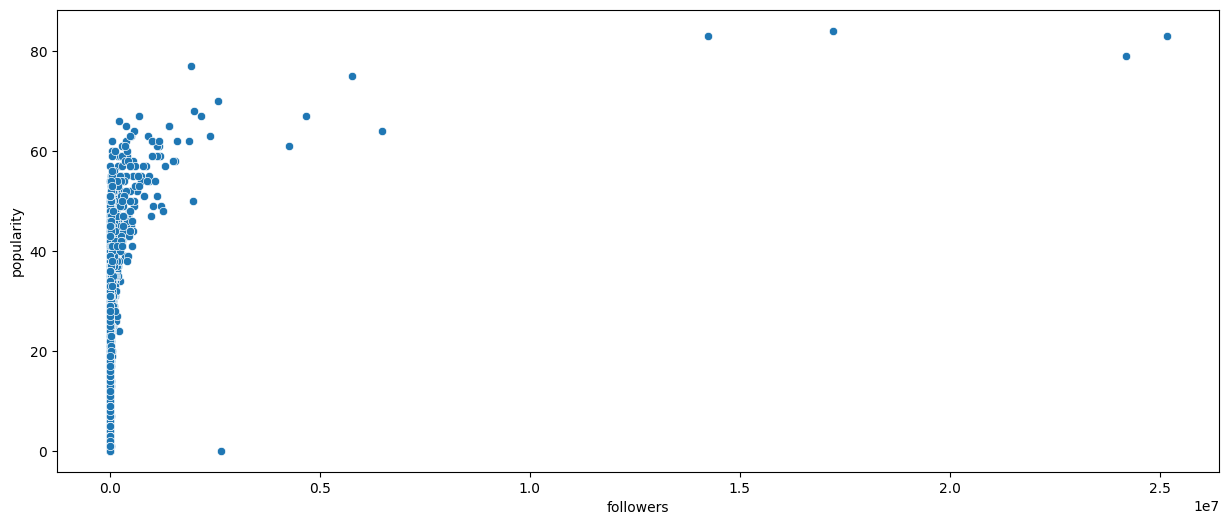

In [97]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=artists, x='followers', y='popularity')
plt.show()